# **Projet : Analyse des Options sur l'Indice VKOSPI**
# <i><span style="color:red">**Deadline : 20:00 19/01/2025**</span></i>
# [**Description du Dataset VKOSPI**](https://www.kaggle.com/datasets/ninetyninenewton/vkospi/data)

Le dataset représente les **données de marché** pour l'indice **VKOSPI**, l'équivalent coréen de l'indice de volatilité implicite **VIX** aux États-Unis. Chaque ligne du dataset correspond à un **jour de trading**, excluant les week-ends et les jours fériés. Les colonnes fournissent diverses informations sur les **transactions et les positions** des options et des futures sur l'indice **KOSPI200**, qui est l'actif sous-jacent du VKOSPI.

---

## **Description des Colonnes**

| **Nom de la colonne**           | **Description**                                                                                |
|---------------------------------|:-----------------------------------------------------------------------------------------------|
| **`Date`**                      | La date du jour de trading.                                                                    |
| **`VKOSPI`**                    | La valeur de l'indice de volatilité implicite **VKOSPI** pour ce jour.                         |
| **`KOSPI200`**                  | La valeur de l'indice **KOSPI200** pour ce jour.                                               |
| **`Open_interest`**             | Le nombre total de **contrats d'options ouverts** (non réglés) pour ce jour.                   |
| **`For_KOSPI_Netbuying_Amount`**| Le **montant net acheté** par les étrangers pour l'indice **KOSPI200** *(Prix × Quantité)*.    |
| **`For_Future_Netbuying_Quantity`** | La **quantité nette achetée** par les étrangers pour les **futures** de **KOSPI200**.          |
| **`For_Call_Netbuying_Quantity`**   | La **quantité nette achetée** par les étrangers pour les **options d'achat (call)**.           |
| **`For_Put_Netbuying_Quantity`**    | La **quantité nette achetée** par les étrangers pour les **options de vente (put)**.           |
| **`Indiv_Future_Netbuying_Quantity`** | La **quantité nette achetée** par les **individus** pour les **futures**.                      |
| **`Indiv_Call_Netbuying_Quantity`**   | La **quantité nette achetée** par les **individus** pour les **options d'achat (call)**.       |
| **`Indiv_Put_Netbuying_Quantity`**    | La **quantité nette achetée** par les **individus** pour les **options de vente (put)**.       |
| **`PCRatio`**                  | Le **ratio Put-Call**, rapport entre le **volume des options put** et **call** *(Put/Call)*.   |
| **`Day_till_expiration`**      | Le **nombre de jours restants** jusqu'à la **date d'expiration** des options.                  |

---

## **Notes supplémentaires :**
- Les données couvrent uniquement les jours de trading actifs.
- Le VKOSPI est un indicateur clé de la **volatilité implicite** du marché coréen.
- Les valeurs nettes d'achat pour les étrangers et les individus offrent un aperçu des stratégies de marché.

---

## **Objectif du Projet :**
prédire, en expliquant rigoureusement et clairement la démarche, la valeur du VKOSPI. La métrique de référence sera la RSME, mais à des fins d'analyse d'autres métrique peuvent être discutée. Aucun algorithmes autres que ceux vus en cours et décrit dans le poly ne seront acceptés.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Exploration et préparation des données**

*Commençons par importer les données et les observer.*

In [42]:
df = pd.read_csv("options_KR.csv")
df.head()

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon


*On souhaite savoir quels types de données sont présents dans le dataset.*

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2580 non-null   object 
 1   VKOSPI                           2580 non-null   float64
 2   KOSPI200                         2580 non-null   float64
 3   Open_interest                    2580 non-null   int64  
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64
 5   For_Future_Netbuying_Quantity    2580 non-null   int64  
 6   For_Call_Netbuying_Quantity      2580 non-null   int64  
 7   For_Put_Netbuying_Quantity       2580 non-null   int64  
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64  
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64  
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64  
 11  PCRatio                          2580 non-null   float64
 12  Day_till_expiration 

*Ensuite, on souhaite avoir une vue statistique du dataset.*

In [28]:
df.describe()

,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration
count,2580.000000,2580.000000,2.580000e+03,2.580000e+03,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,16.744302,259.246508,2.303927e+06,2.889290e+10,10.226744,2727.117829,14117.202326,4.820930,16000.406589,6695.945736,0.954837,9.982946
std,5.327865,29.034358,1.578398e+06,2.560887e+11,3953.221118,19549.308255,25202.453076,2126.388898,53037.030365,59832.131764,0.170583,6.293434
min,9.720000,174.320000,2.242960e+05,-1.310000e+12,-20745.000000,-174455.000000,-183760.000000,-11879.000000,-179929.000000,-151533.000000,0.280000,0.000000
25%,13.087500,243.750000,1.013118e+06,-1.130000e+11,-2164.750000,-2863.250000,1836.000000,-1209.500000,-2574.000000,-13051.250000,0.850000,5.000000
50%,15.305000,257.310000,1.879194e+06,2.221070e+10,31.000000,1780.000000,9257.500000,-13.000000,4984.000000,-2065.500000,0.950000,10.000000
75%,18.772500,271.570000,3.236718e+06,1.670000e+11,2221.500000,7435.250000,23097.500000,1213.500000,17872.250000,9729.000000,1.050000,15.000000
max,50.110000,338.830000,9.134484e+06,1.720000e+12,20265.000000,152445.000000,228939.000000,10325.000000,908263.000000,919563.000000,1.790000,26.000000


*Maintenant, on souhaite observer la distribution de chaque colonne pour vérifier la présence de valeurs aberrantes, ainsi que la présence de valeurs manquantes et dupliquées.*

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_columns(columns):
    sns.set_theme(context='notebook', style='whitegrid')
    figure, axes = plt.subplots(4, 3, figsize=(20, 15), sharey=True)
    for i in range(4):
        for j in range(3):
            if i*3+j < len(columns) and columns[i*3+j] != "Date":
                sns.histplot(df[columns[i * 3 + j]], ax=axes[i, j])
                axes[i, j].set_title(f"Distribution de {columns[i * 3 + j]}")

    figure.tight_layout()
    plt.show()

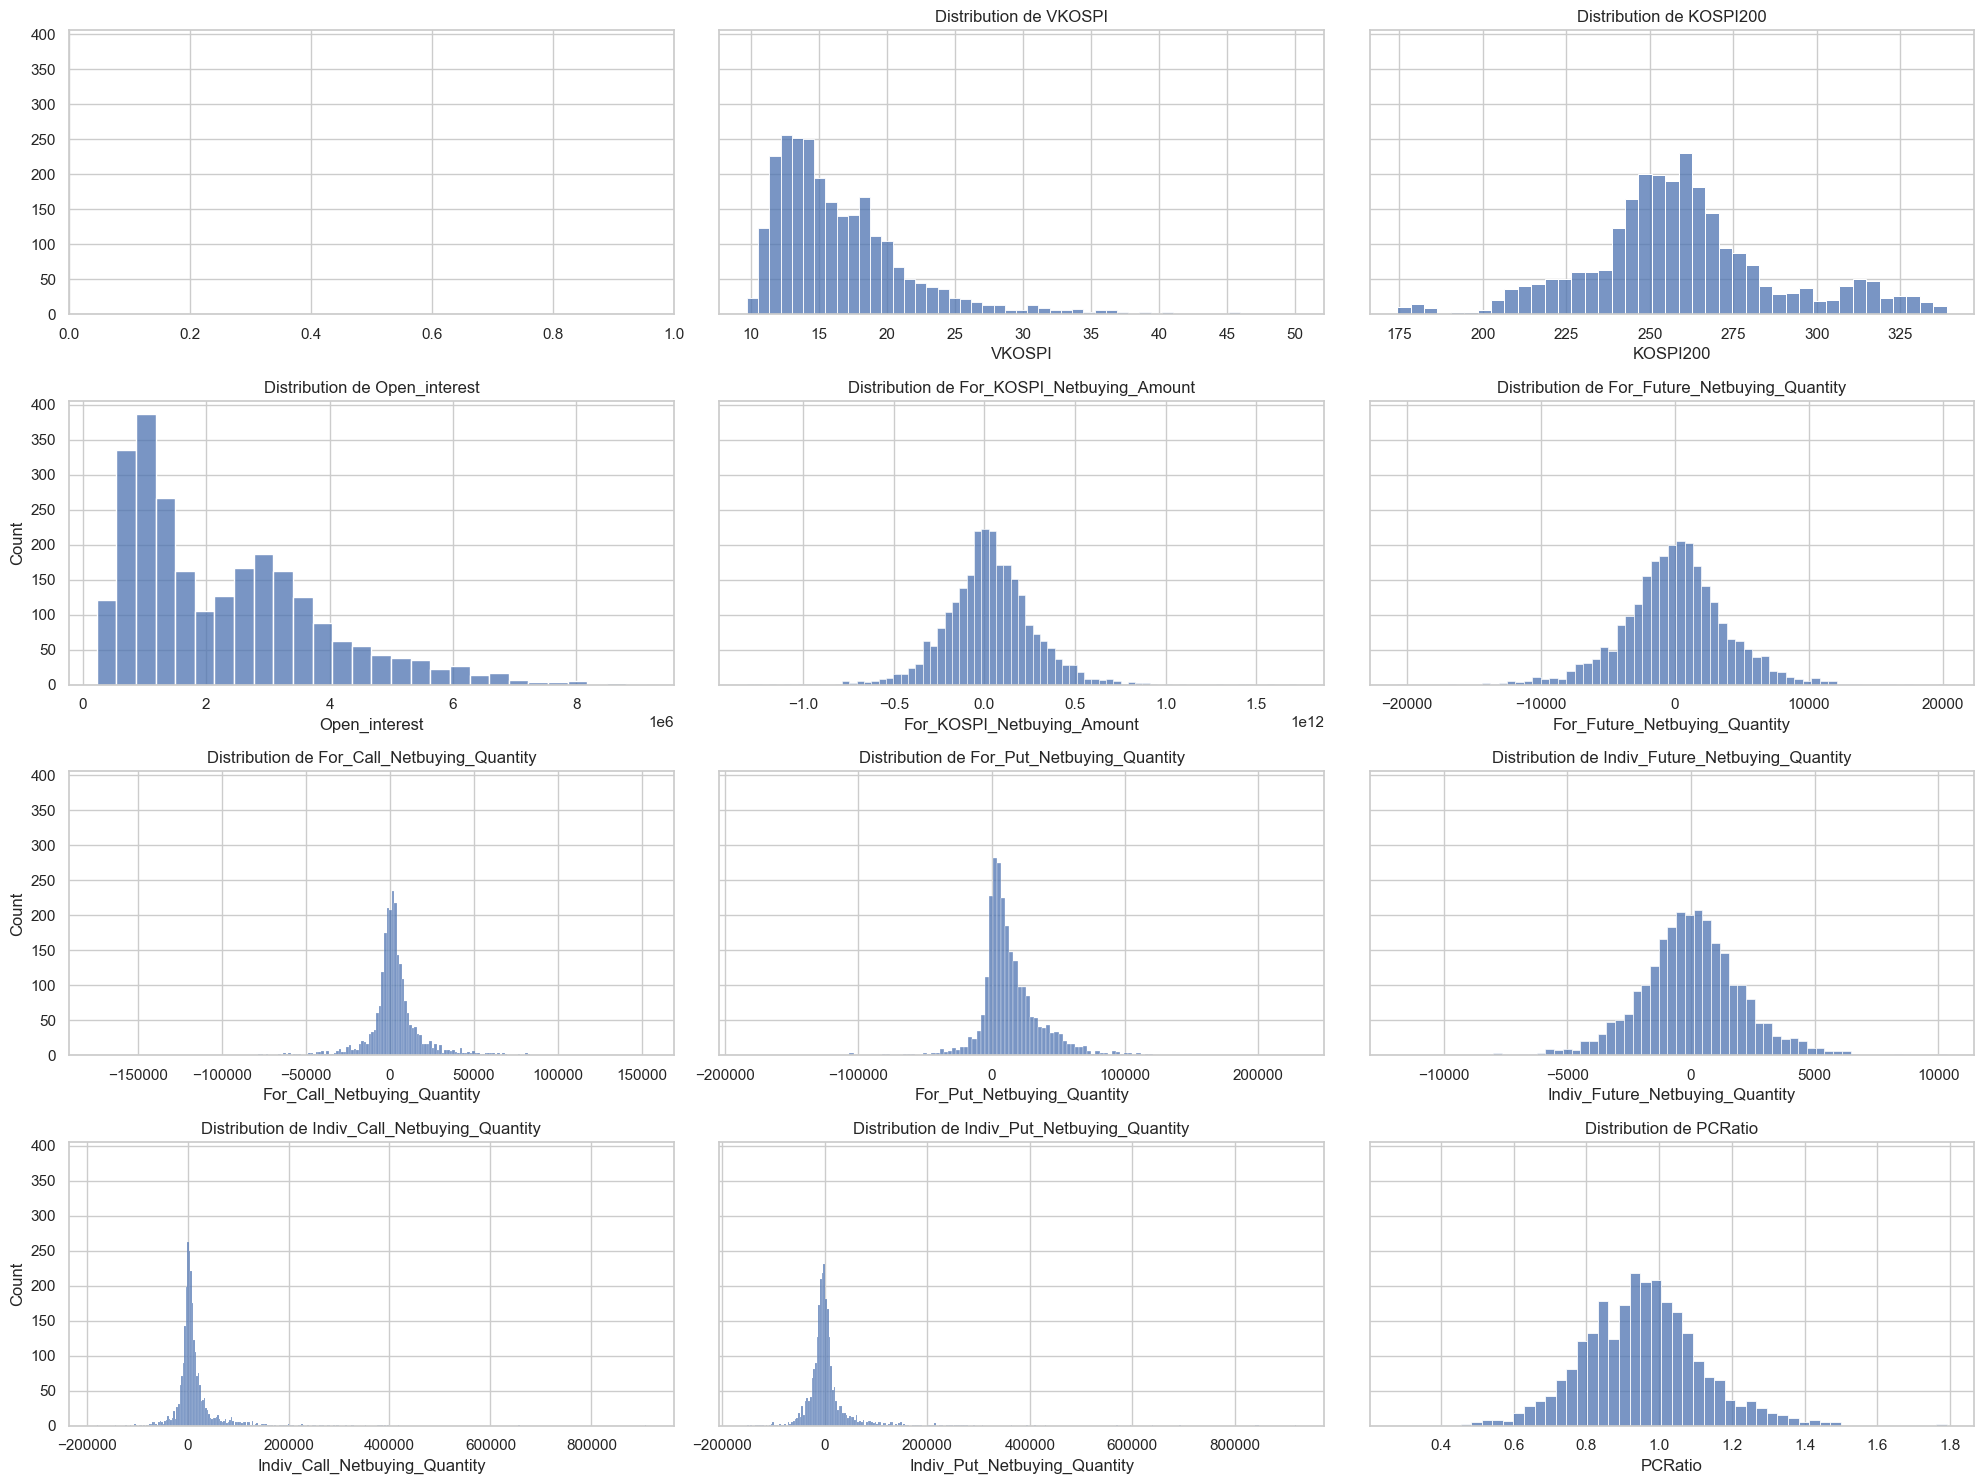

In [30]:
plot_columns(df.columns)

In [31]:
def explore_column(df, column, target_column, alpha=0.8, figsize=(15, 8)):

    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title("Distribution de la variable %s" % column)

    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df[target_column], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel(target_column.capitalize())
        plt.title("%s in function of %s" % (target_column.capitalize(), column))

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()

    plt.suptitle("Variable %s" % column)
    plt.show()

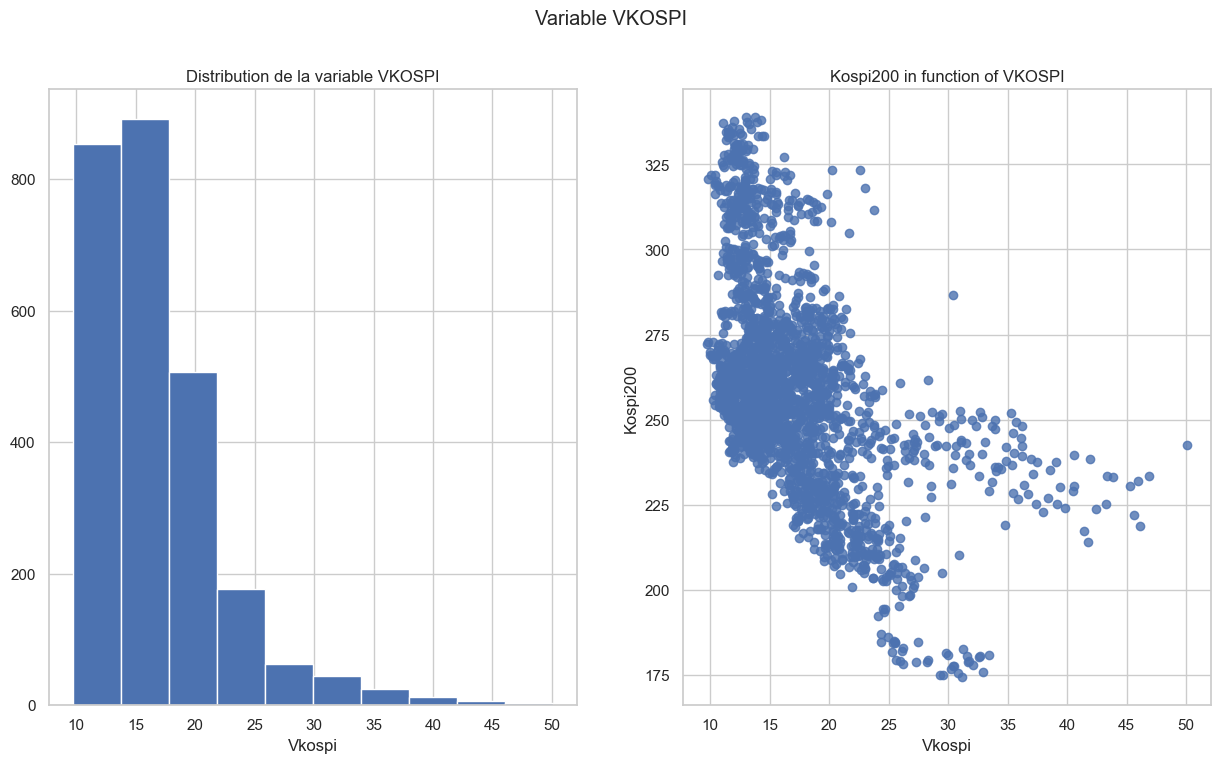

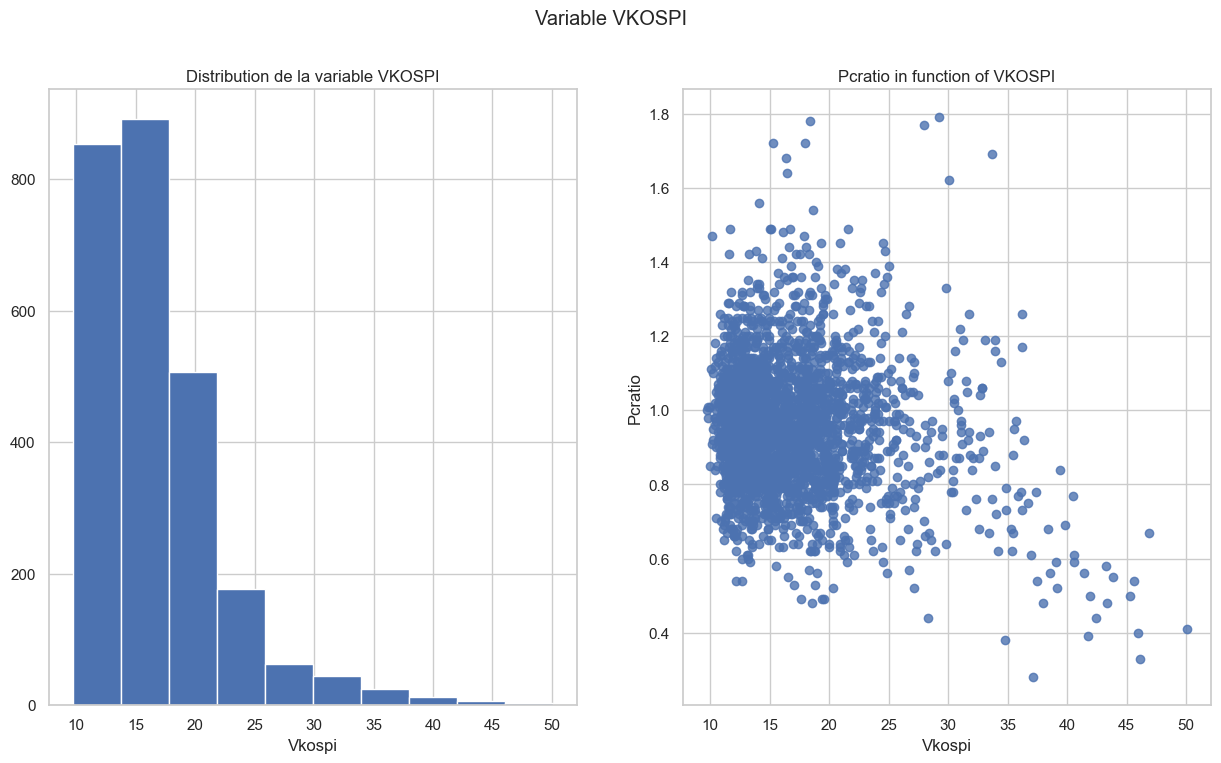

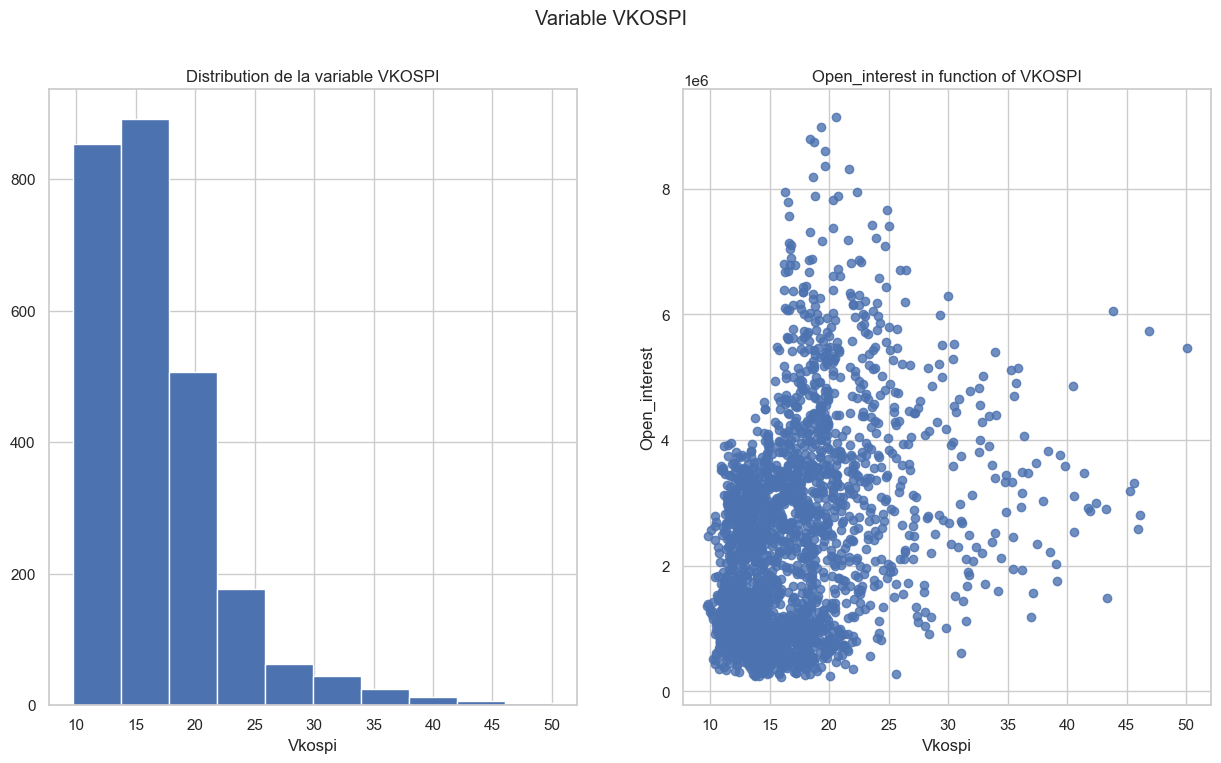

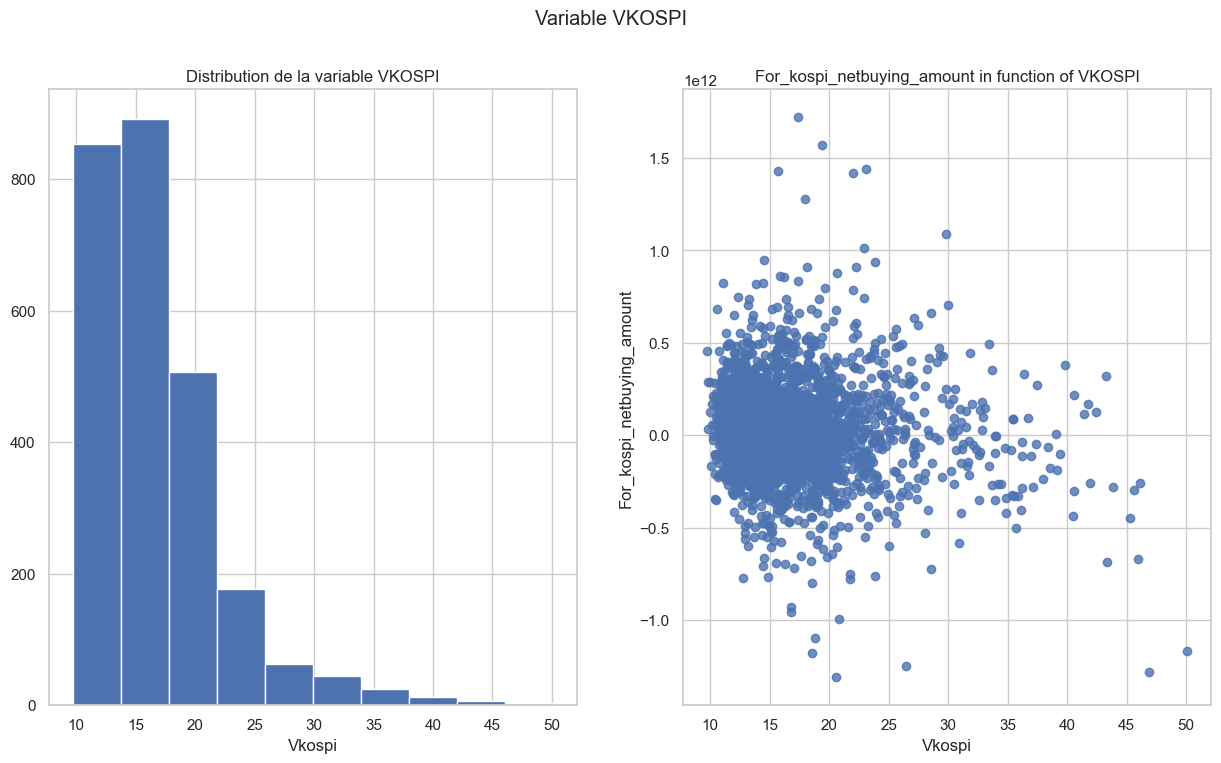

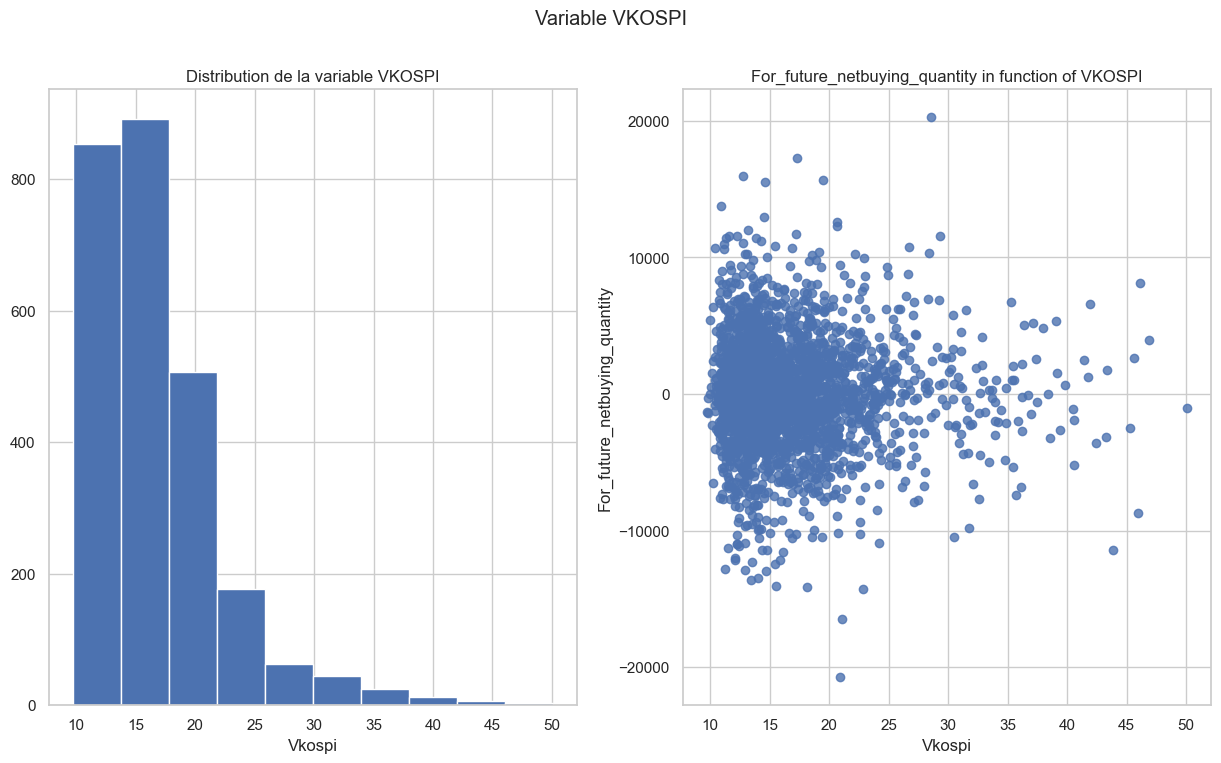

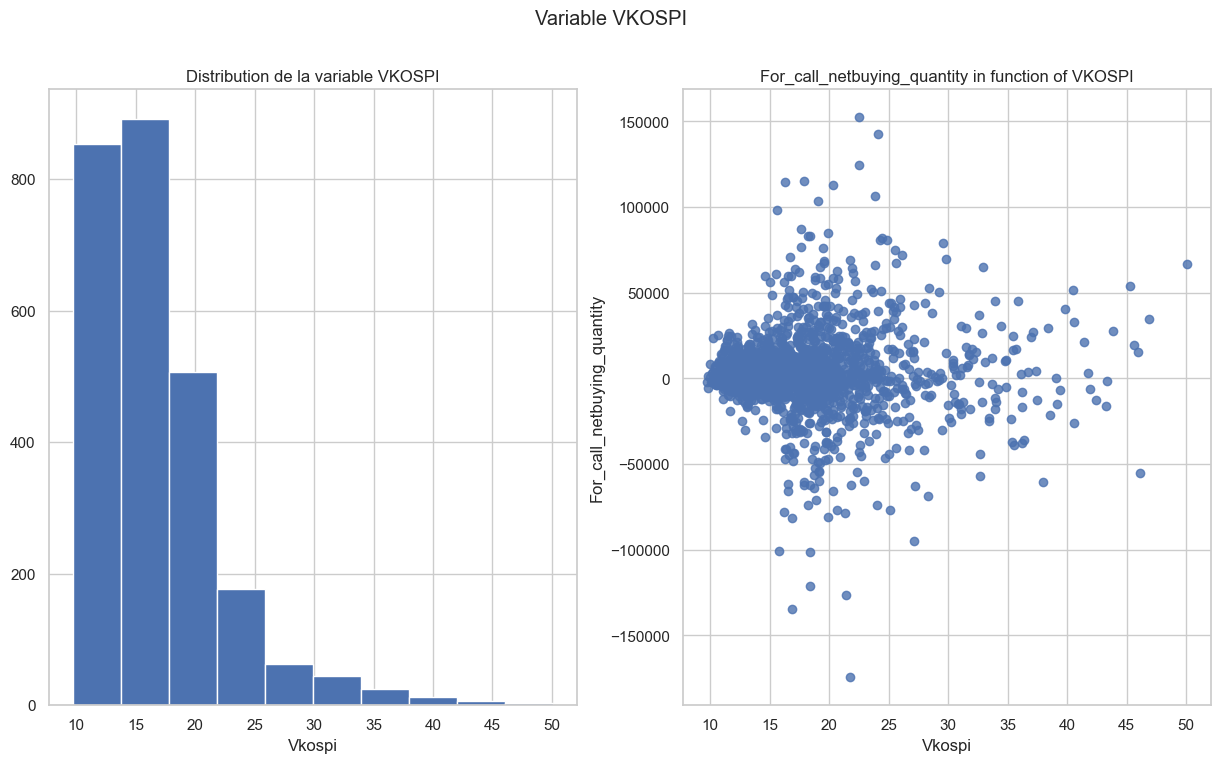

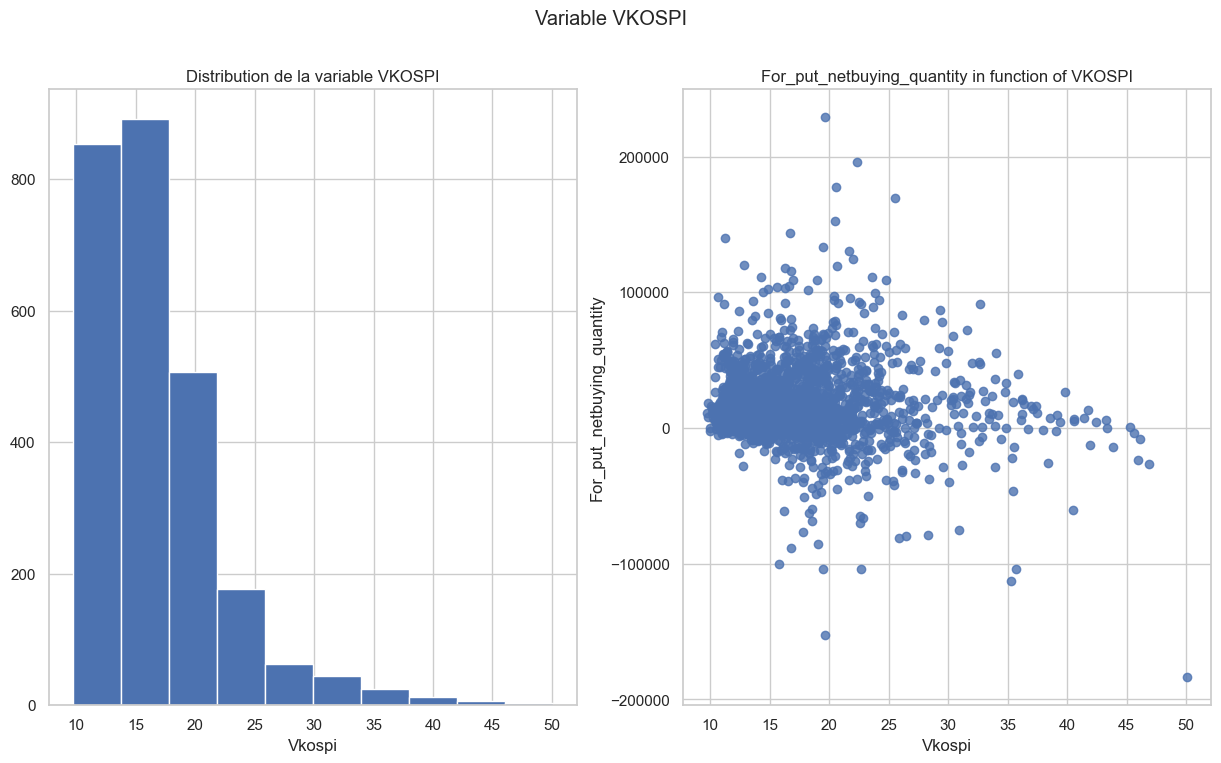

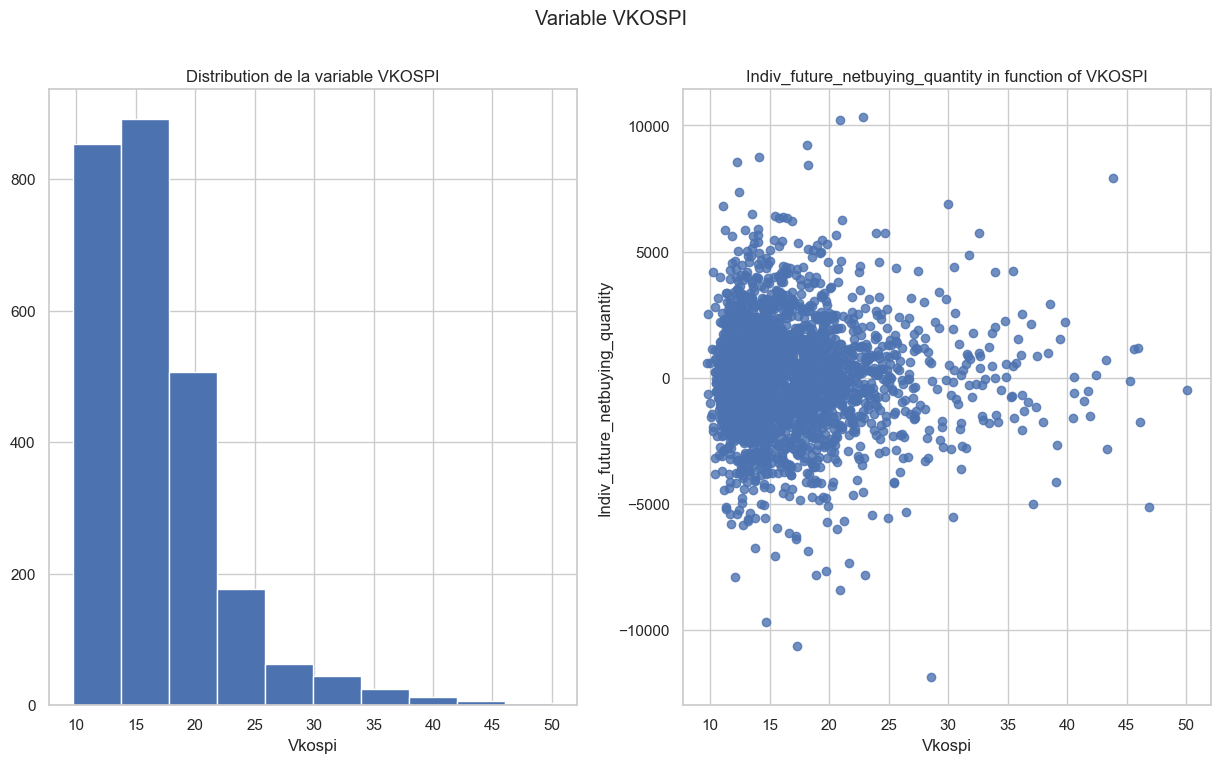

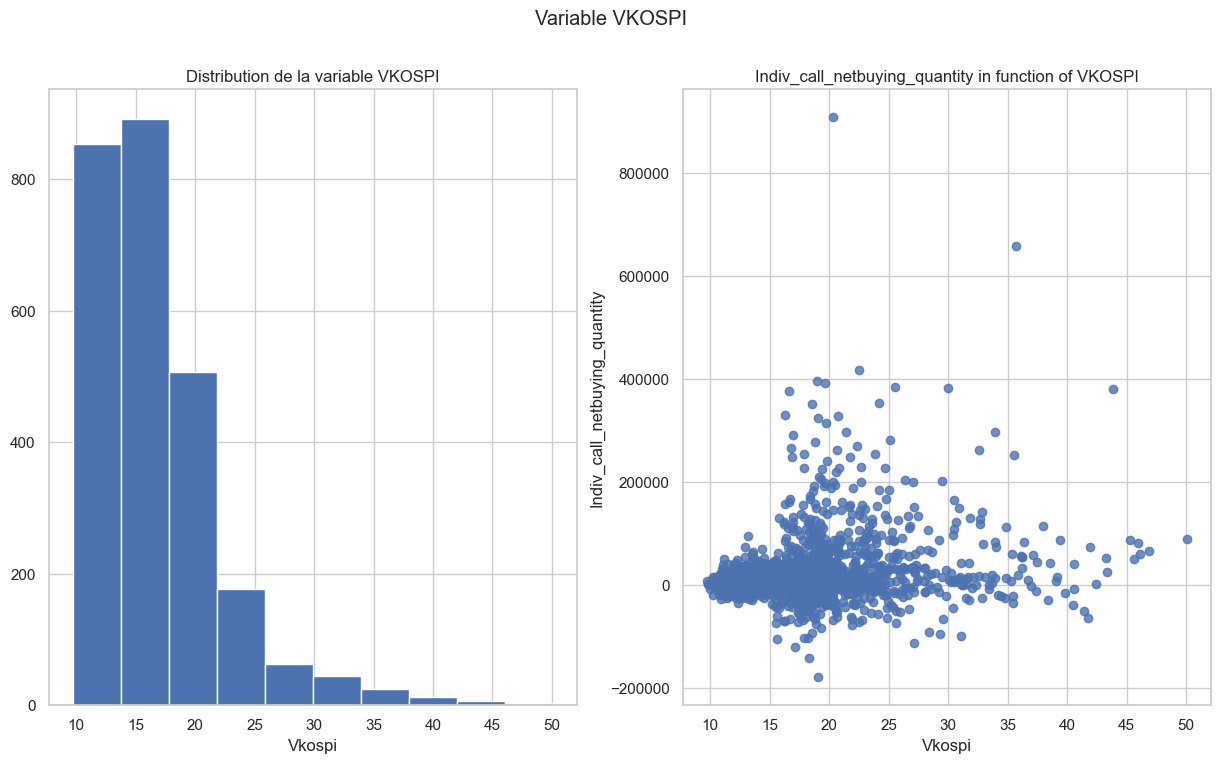

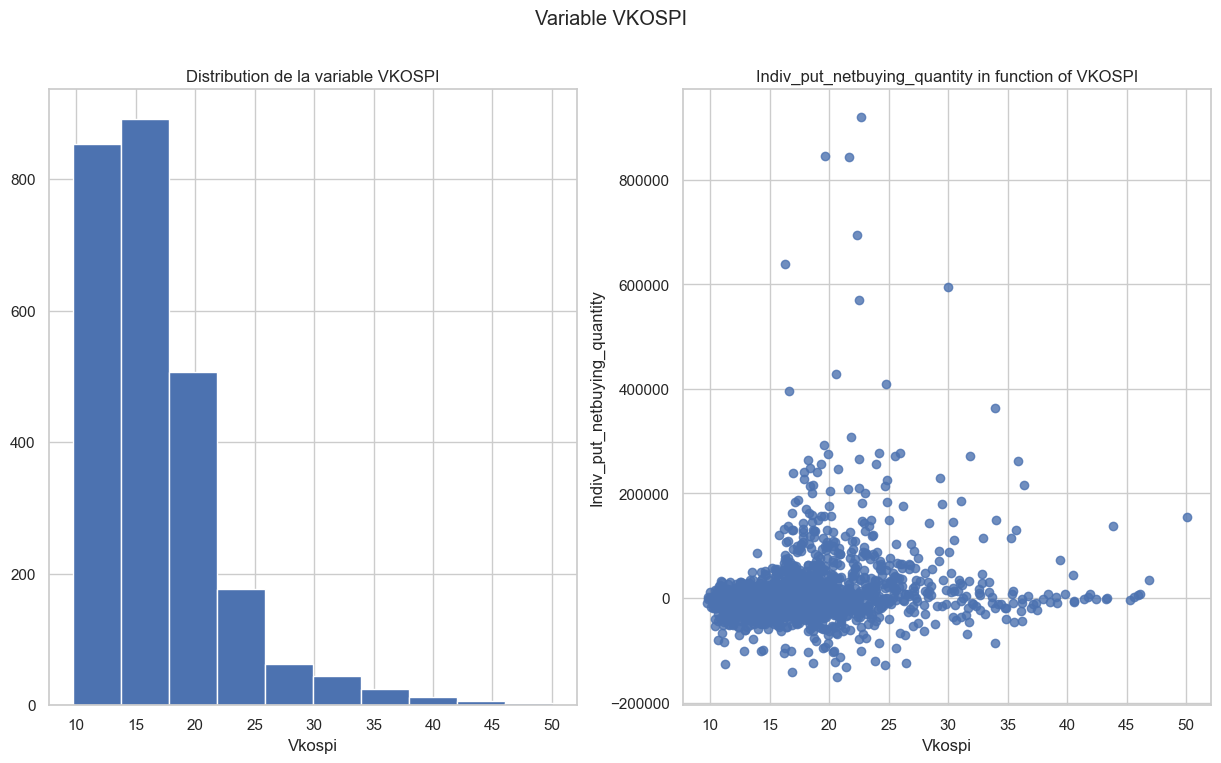

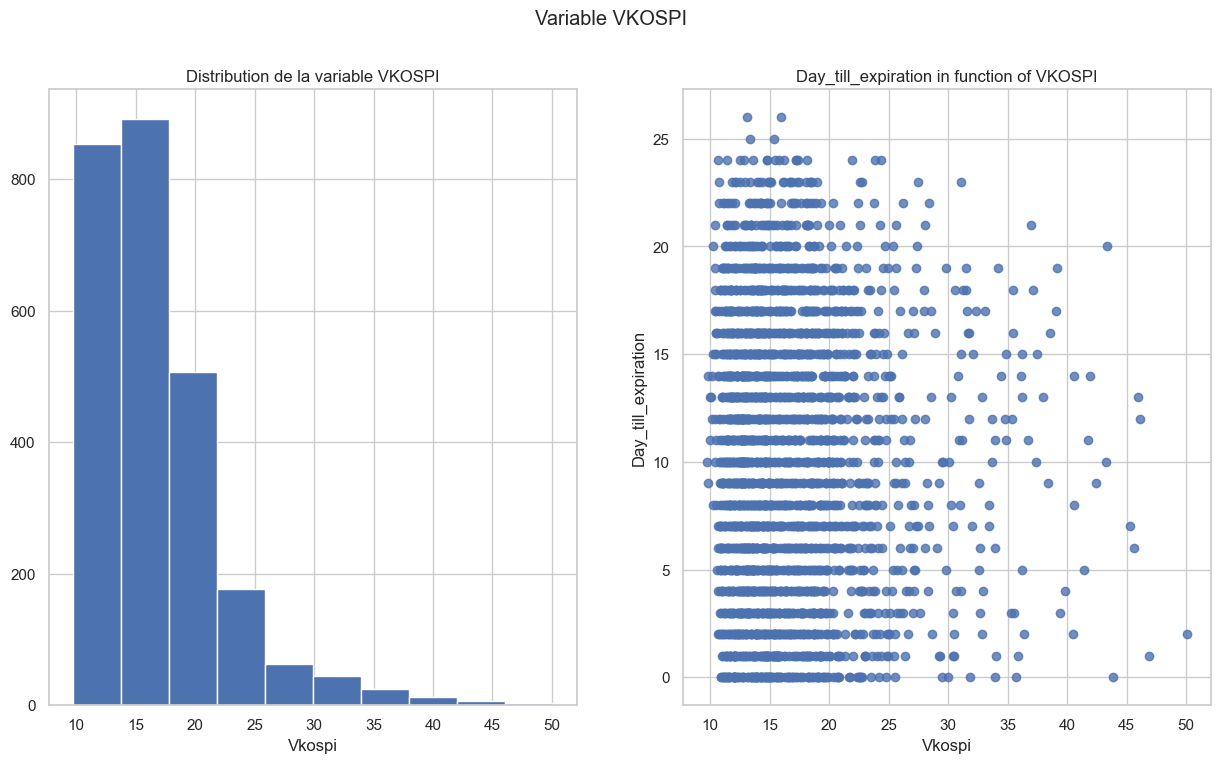

In [32]:
explore_column(df, "VKOSPI", "KOSPI200")
explore_column(df, "VKOSPI", "PCRatio")
explore_column(df, "VKOSPI", "Open_interest")
explore_column(df, "VKOSPI", "For_KOSPI_Netbuying_Amount")
explore_column(df, "VKOSPI", "For_Future_Netbuying_Quantity")
explore_column(df, "VKOSPI", "For_Call_Netbuying_Quantity")
explore_column(df, "VKOSPI", "For_Put_Netbuying_Quantity")
explore_column(df, "VKOSPI", "Indiv_Future_Netbuying_Quantity")
explore_column(df, "VKOSPI", "Indiv_Call_Netbuying_Quantity")
explore_column(df, "VKOSPI", "Indiv_Put_Netbuying_Quantity")
explore_column(df, "VKOSPI", "Day_till_expiration")

In [33]:
print("Valeurs manquantes :")
print(np.sum(df.isna(), axis=0))

Valeurs manquantes :
Date                               0
VKOSPI                             0
KOSPI200                           0
Open_interest                      0
For_KOSPI_Netbuying_Amount         0
For_Future_Netbuying_Quantity      0
For_Call_Netbuying_Quantity        0
For_Put_Netbuying_Quantity         0
Indiv_Future_Netbuying_Quantity    0
Indiv_Call_Netbuying_Quantity      0
Indiv_Put_Netbuying_Quantity       0
PCRatio                            0
Day_till_expiration                0
Day_of_a_week                      0
dtype: int64


In [34]:
print("Valeurs dupliquées :")
print(np.sum(df.duplicated(), axis=0))

Valeurs dupliquées :
0


### *Commentaires :*
- Les données ne semblent pas contenir de valeurs aberrantes.
- On peut observer qu'il y a de moindres corrélations linéaires entre VKOSPI et les autres variables, sauf pour KOSPI200, ce qui présente une corrélation linéaire négative à forte.

=> *Les relations avec VKOSPI semblent souvent non linéaires ou conditionnées à des seuils particuliers. Les modèles de régression linéaire simple risquent d'être insuffisants pour capturer les relations complexes. Une approche basée sur des modèles plus sophistiqués comme les arbres de décision ou le boosting pourrait être plus appropriée.*

### **Analyse exploratoire des données**

*Élovution temporelle de VKOSPI et KOSPI200*

*Une première étape consiste à analyser l'évolution temporelle de VKOSPI et KOSPI200.*

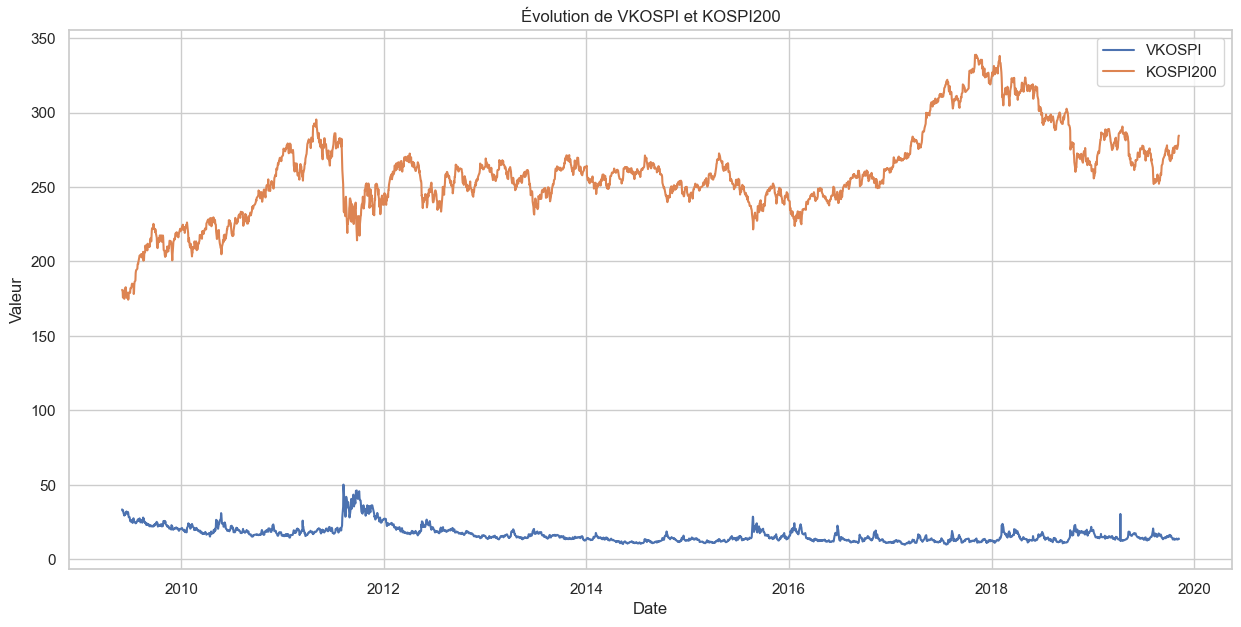

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['VKOSPI'], label='VKOSPI')
plt.plot(df['Date'], df['KOSPI200'], label='KOSPI200')
plt.title("Évolution de VKOSPI et KOSPI200")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
plt.show()

1. Observation :
- Le graphique montre une certaine corrélation inverse entre le VKOSPI et le KOSPI200.
- Lorsque le KOSPI200 diminue, le VKOSPI a tendance à augmenter, indiquant une hausse de la volatilité implicite en période d'incertitude ou de baisse du marché.

*Corrélation entre les différentes variables*

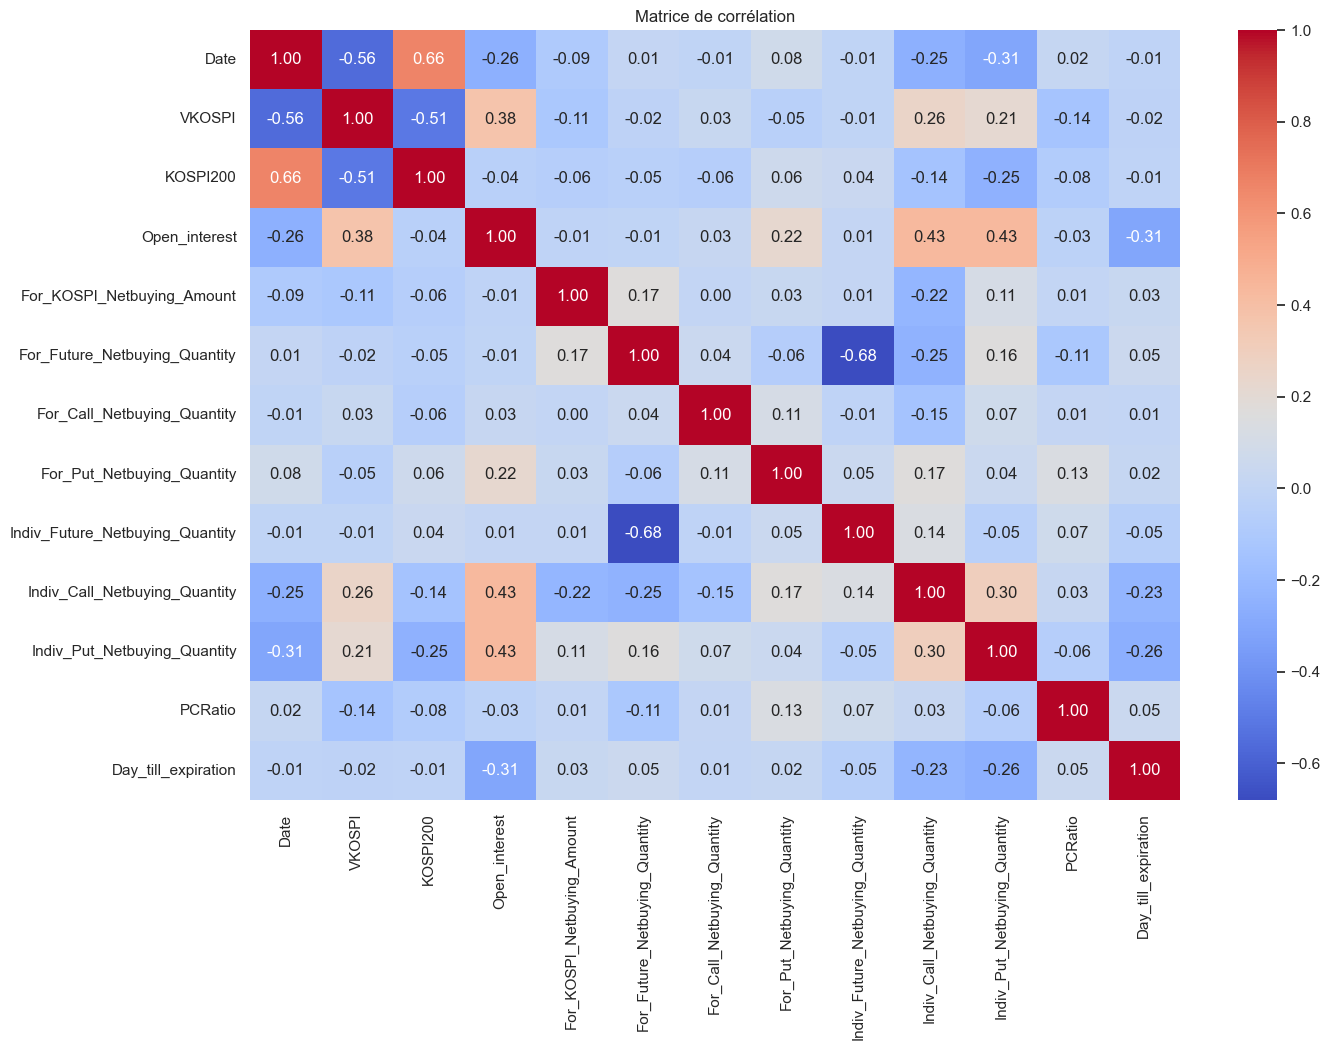

In [36]:
correlation_matrix = df.drop(columns=["Day_of_a_week"]).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

1. Observation :
- On observe une corrélation négative (-0.51) entre VKOSPI et KOSPI200, ce qui confirme l'observation précédente.
- PCRatio semble également avoir une corrélation négative (-0.14) avec VKOSPI, qui indique que lorsque le ratio Put-Call augmente, la volatilité implicite a tendance à diminuer.

### **Modélisation**


*NOTA :* *D'après TP3 - Boosting, on a vu que la data set est indexé par le temps, on ne peut donc pas faire la coupure aléatoire. On va utiliser la méthode de la coupure temporelle pour séparer les données en un ensemble d'entraînement et un ensemble de test.*

In [43]:
def split_time_dataset(X, y, train_ratio):
    assert X.shape[0] == len(y)

    n = X.shape[0]
    index = round(n * train_ratio)

    X_train, X_test= X.iloc[:index, ], X.iloc[index:, ]
    y_train, y_test = y[:index], y[index:]

    return X_train, X_test, y_train, y_test

*Pour la mesure de performance, on utilisera la RMSE (Root Mean Squared Error).*

*NOTA : Plus la RMSE est proche de 0, meilleure est la prédiction.*

In [44]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

*On s'intéresse aussi à la métrique R2 pour évaluer la qualité de la prédiction.*

*NOTA : Plus R2 est proche de 1, meilleure est la prédiction.*

In [45]:
from sklearn.metrics import r2_score

*On va maintenant construire des modèles utilisant la régression linéaire, le Random Forest et Boosting (Gradient Boosting) pour prédire la valeur de VKOSPI.*

In [52]:
from sklearn.preprocessing import StandardScaler

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['VKOSPI_lag1'] = df['VKOSPI'].shift(1)
df = df.dropna()

X = df.drop(columns=['Date', 'VKOSPI', 'Day_of_a_week'])
y = df['VKOSPI']

X_train, X_test, y_train, y_test = split_time_dataset(X, y, train_ratio=0.8)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation des modèles
results = [
    {"model": "Régression Linéaire", "RMSE": rmse(y_test, y_pred_linear), "R2": r2_score(y_test, y_pred_linear)},
    {"model": "Random Forest", "RMSE": rmse(y_test, y_pred_rf), "R2": r2_score(y_test, y_pred_rf)},
    {"model": "Gradient Boosting", "RMSE": rmse(y_test, y_pred_gb), "R2": r2_score(y_test, y_pred_gb)}
]

results_df = pd.DataFrame(results)
results_df

,model,RMSE,R2
0,Régression Linéaire,1.399601,0.685620
1,Random Forest,1.459026,0.658357
2,Gradient Boosting,1.370302,0.698644
